# SOM implementation in Python using Sklearn/SciKit

### Imports

In [9]:
# Building SOM
from sklearn_som.som import SOM
from sklearn import datasets, metrics # Contains IRIS dataset
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import subprocess as sp
import os

# Plotting graph
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

### Data loading

In [4]:
# IRIS data loading
iris = datasets.load_iris()
iris_data = iris.data[:, :2]
iris_label = iris.target

# BME data loading
bme_file = open("datasets/BME_MOD.txt", "r")
bme_data = []
for line in bme_file:
    bme_data.append(line.split())
    for i in range(0, 129):
        bme_data[-1][i] = float(bme_data[-1][i])


# Confirm all 180 time series (train + test) loaded into array
len(bme_data)

# Convert python array to numpy array
bme_data = np.array(bme_data)

# Scaling data
scaler = MinMaxScaler()
bme_data = scaler.fit_transform(bme_data)

### Building SOMs

In [21]:
# SOM for IRIS dataset
iris_som = SOM(m = 3, n = 1, dim = 2)   # 3x1 structure for the SOM
iris_som.fit(iris_data)

# SOM for BME dataset
bme_som = SOM(m = 3, n = 1, dim = 129)
bme_som.fit(bme_data)

### Applying datasets to SOMs

In [22]:
iris_predictions = iris_som.predict(iris_data)
bme_predictions = bme_som.predict(bme_data)

bme_predictions

array([0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0,
       0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 1, 0, 2, 0, 0, 2, 2, 2,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 0, 0])

### Plotting graphs

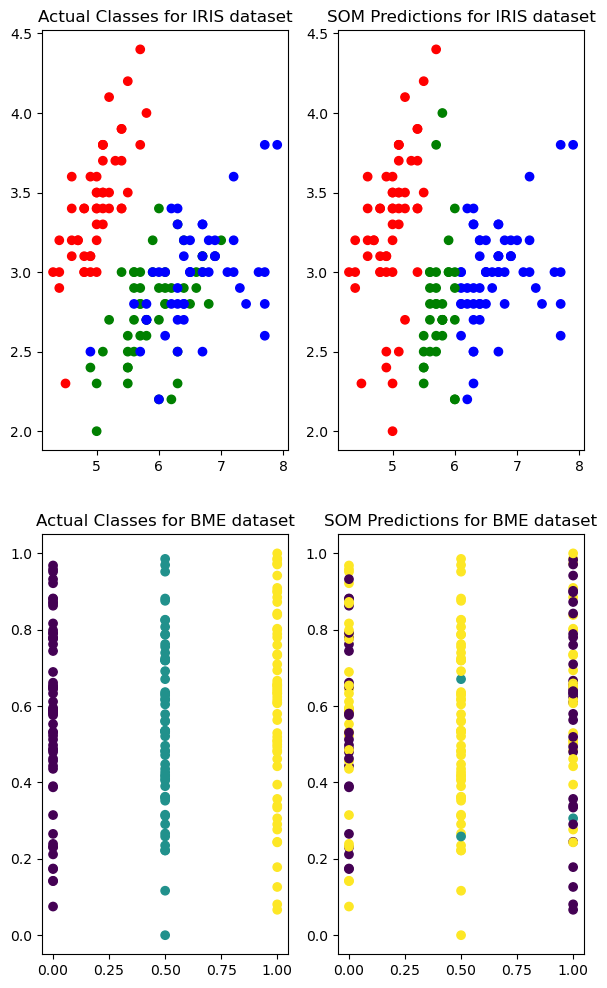

In [23]:
# Plot the results
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(7,12))
x_iris = iris_data[:,0]
y_iris = iris_data[:,1]
x_bme = bme_data[:, 0]
y_bme = bme_data[:, 1]
colors = ['red', 'green', 'blue']

ax[0,0].scatter(x_iris, y_iris, c=iris_label, cmap=ListedColormap(colors))
ax[0,0].title.set_text('Actual Classes for IRIS dataset')
ax[0,1].scatter(x_iris, y_iris, c=iris_predictions, cmap=ListedColormap(colors))
ax[0,1].title.set_text('SOM Predictions for IRIS dataset')
ax[1,0].scatter(x_bme, y_bme, c=bme_data[:, 0])
ax[1,0].title.set_text('Actual Classes for BME dataset')
ax[1,1].scatter(x_bme, y_bme, c=bme_predictions)
ax[1,1].title.set_text('SOM Predictions for BME dataset')

### RAND Score

In [11]:
print("RAND Scores:\n IRIS - Sklearn:", metrics.rand_score(iris_label, iris_predictions))

RAND Scores:
 IRIS - Sklearn: 0.8052796420581656


### Retrieve c-code's output

In [8]:
cmd = '''
    gcc -o som som.c -lm && ./som bme
'''
print(os.getcwd())
print(os.listdir('.'))
output = sp.check_output(cmd.strip('\n').split(), shell=True)
print(output.decode('utf-8'))

/home/zanilicious/Documents/IL2233/Laborations/IL2233/3-lab
['a.out', 'som.c', 'datasets', 'k-means.c', 'data.h', 'IL2233VT23_Lab3_Time_Series_Clustering.pdf', 'flowcharts', 'som', 'pseudocode', 'som.ipynb', 'k-means.ipynb']


gcc: fatal error: no input files
compilation terminated.


CalledProcessError: Command '['gcc', '-o', 'som', 'som.c', '-lm', '&&', './som', 'bme']' returned non-zero exit status 1.